<a href="https://colab.research.google.com/github/palanipsb/Python-Learning/blob/main/Titanic%20Suvival%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
all_files = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
training_data = pd.read_csv(io.BytesIO(all_files['train.csv']))
test_data = pd.read_csv(io.BytesIO(all_files['test.csv']))

In [4]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
training_data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

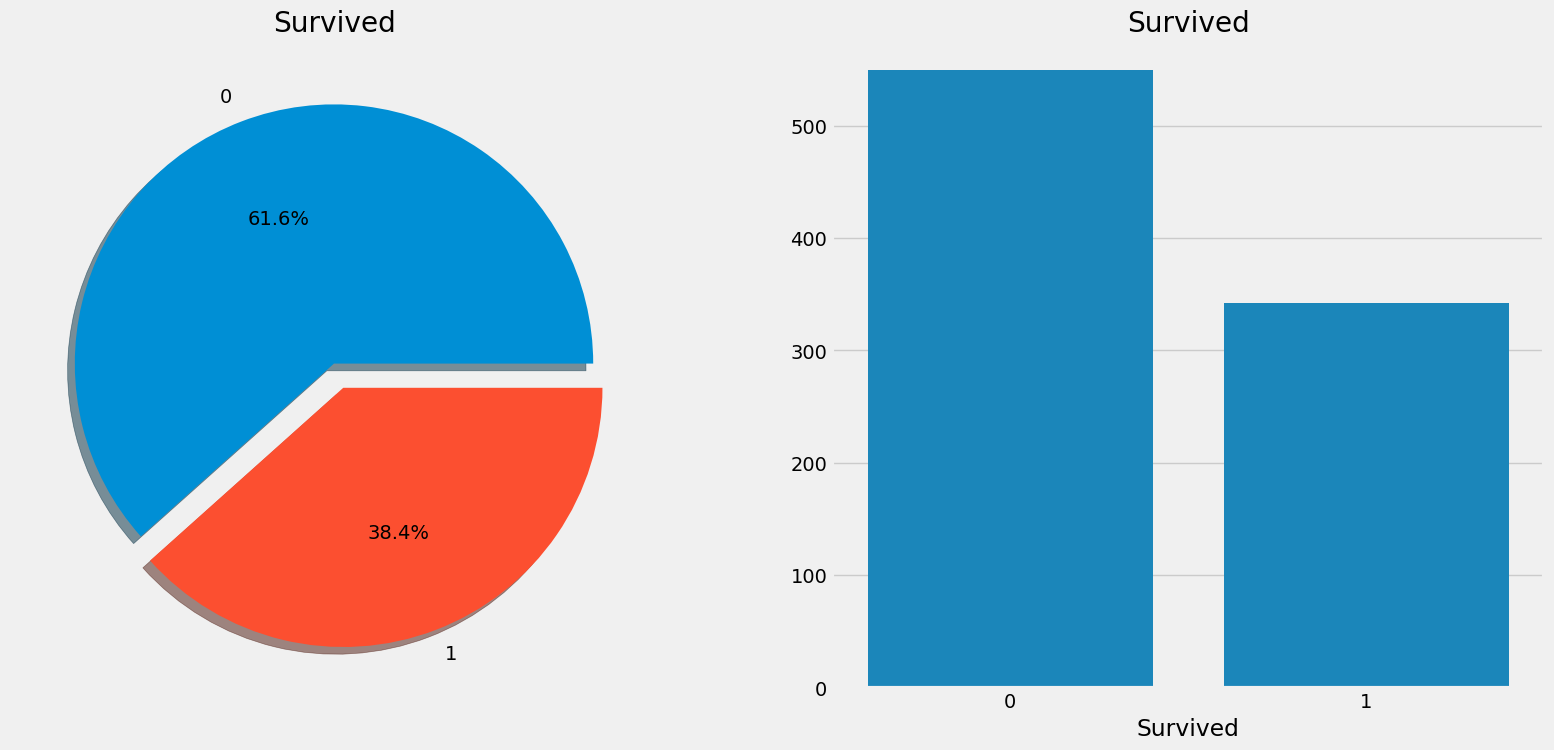

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
training_data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=training_data,ax=ax[1])
ax[1].set_title('Survived')
ax[1].set_ylabel('')
plt.show()

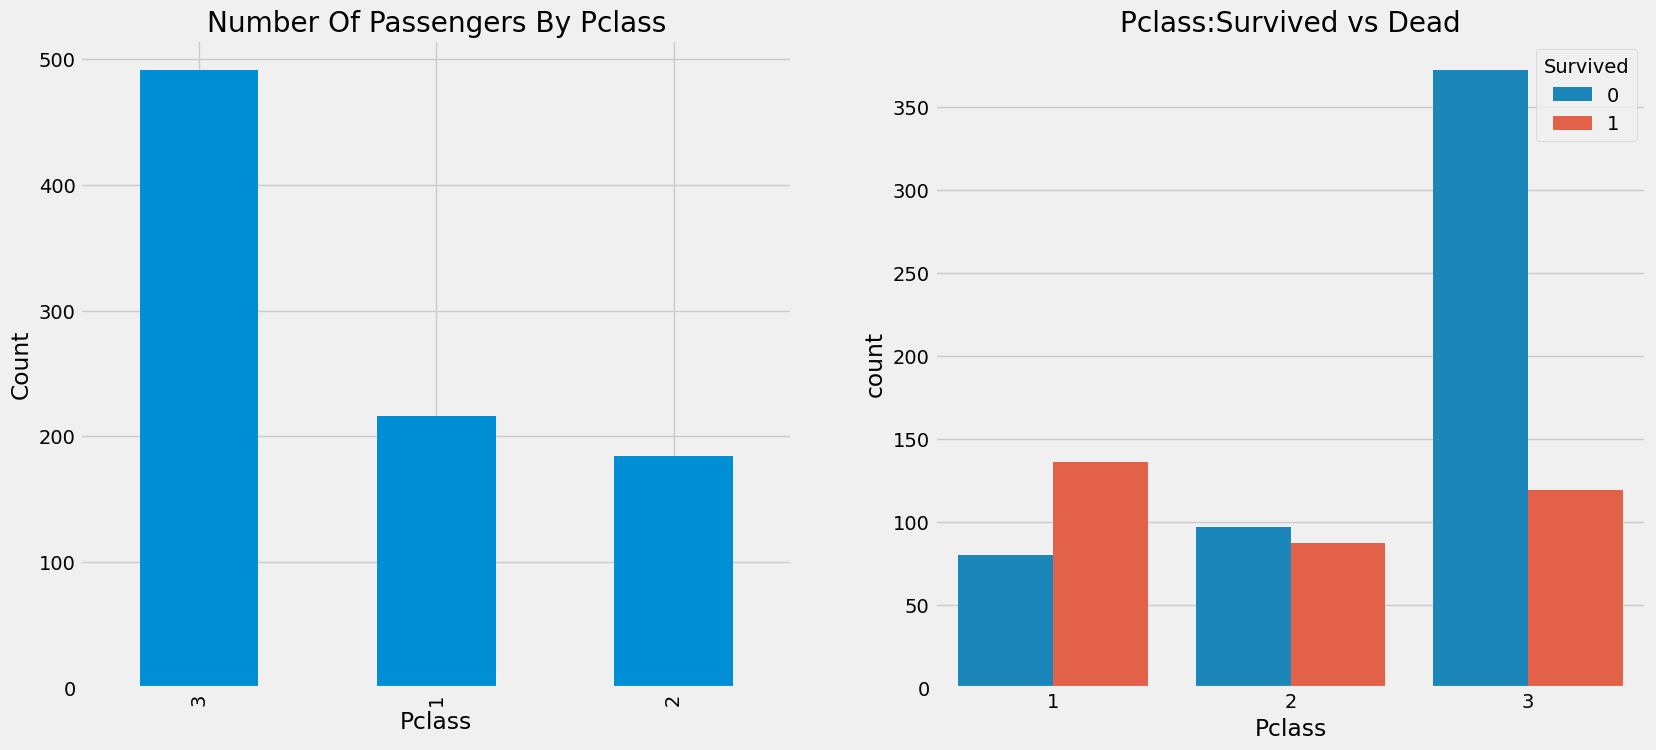

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))
training_data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass', hue='Survived', data = training_data, ax = ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()


In [ ]:
pd.crosstab([training_data.Sex,training_data.Survived],training_data.Pclass)

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47

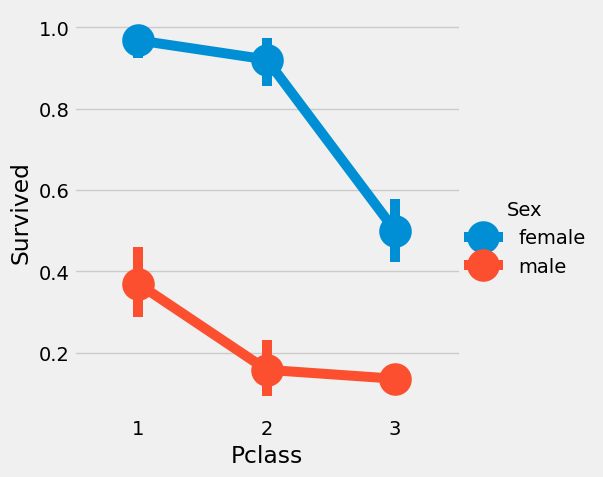

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind="point", data=training_data)

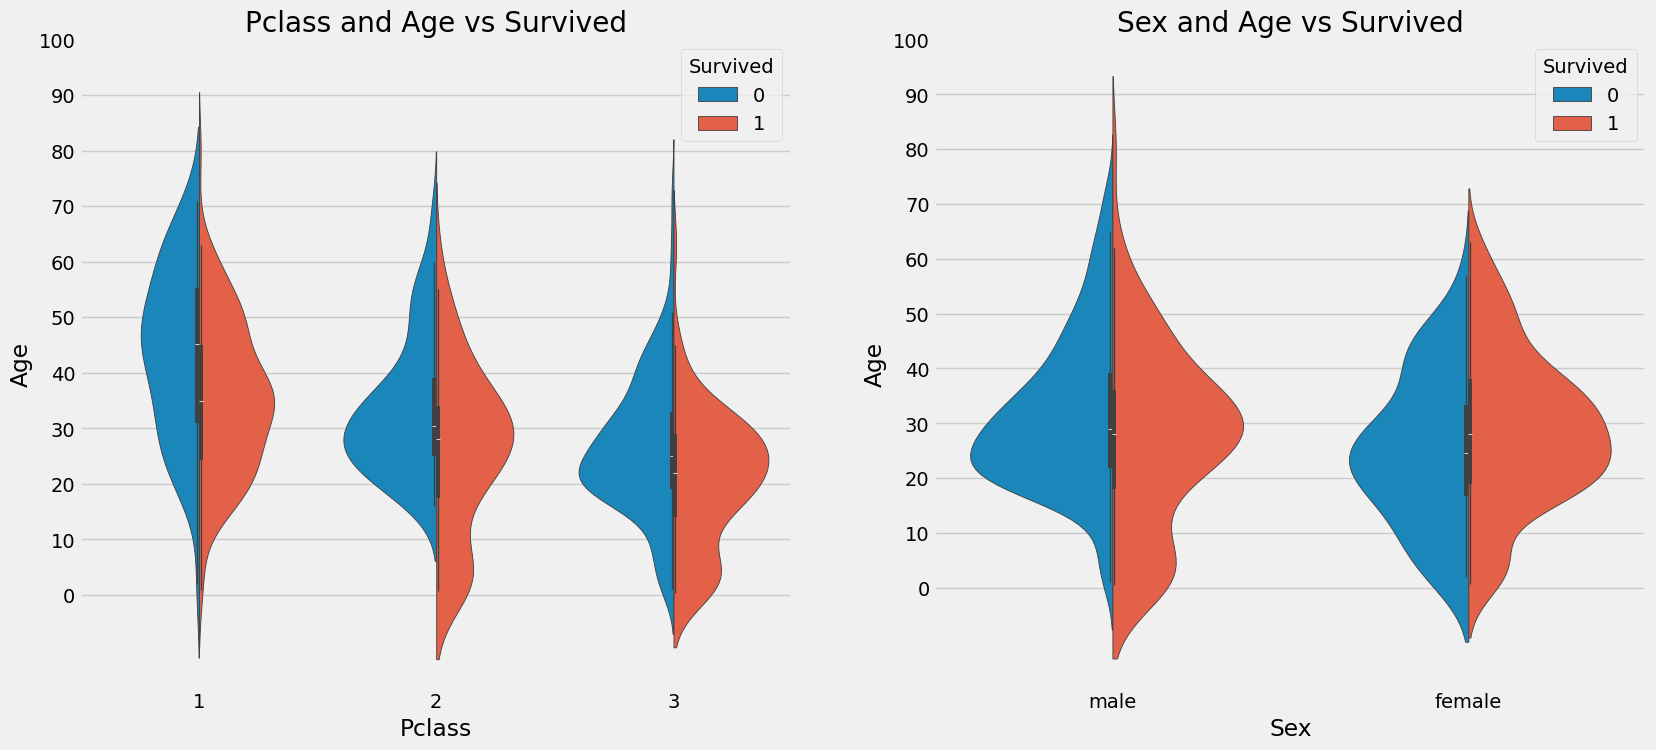

In [ ]:
f,ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x='Pclass',y='Age', hue='Survived', data = training_data,ax=ax[0],split=True)
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex',y='Age',hue='Survived',data = training_data,ax=ax[1],split=True)
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


In [7]:
training_data['Initial'] = 0
for i in training_data:
  training_data['Initial'] = training_data.Name.str.extract('([A-Za-z]+)\.')

In [8]:
pd.crosstab(training_data.Initial,training_data.Sex).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [9]:
training_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [10]:
training_data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [11]:
training_data.loc[(training_data.Age.isnull() & training_data.Initial=='Mr'),'Age'] = 33
training_data.loc[(training_data.Age.isnull() & training_data.Initial=='Mrs'),'Age'] = 36
training_data.loc[(training_data.Age.isnull() & training_data.Initial=='Miss'),'Age'] = 22
training_data.loc[(training_data.Age.isnull() & training_data.Initial=='Master'),'Age'] = 5
training_data.loc[(training_data.Age.isnull() & training_data.Initial=='Other'),'Age'] = 46

In [12]:
training_data.Age.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

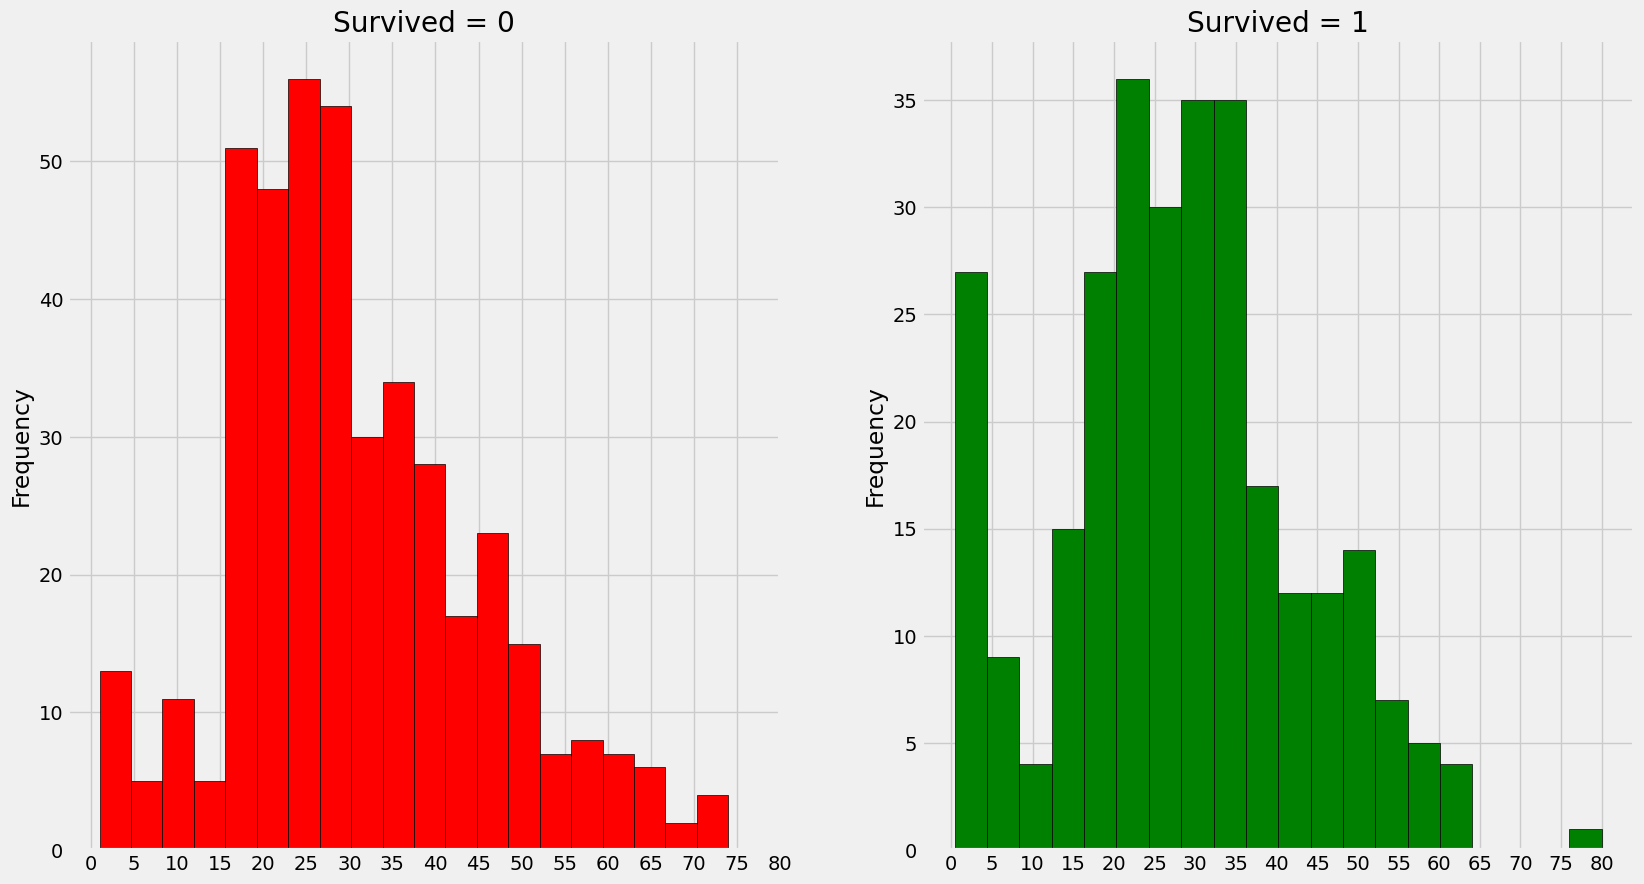

In [21]:
f,ax = plt.subplots(1,2,figsize = (18,10))
training_data[training_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black', color='Red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
training_data[training_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,color='green',edgecolor='black')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(x1)
plt.show()

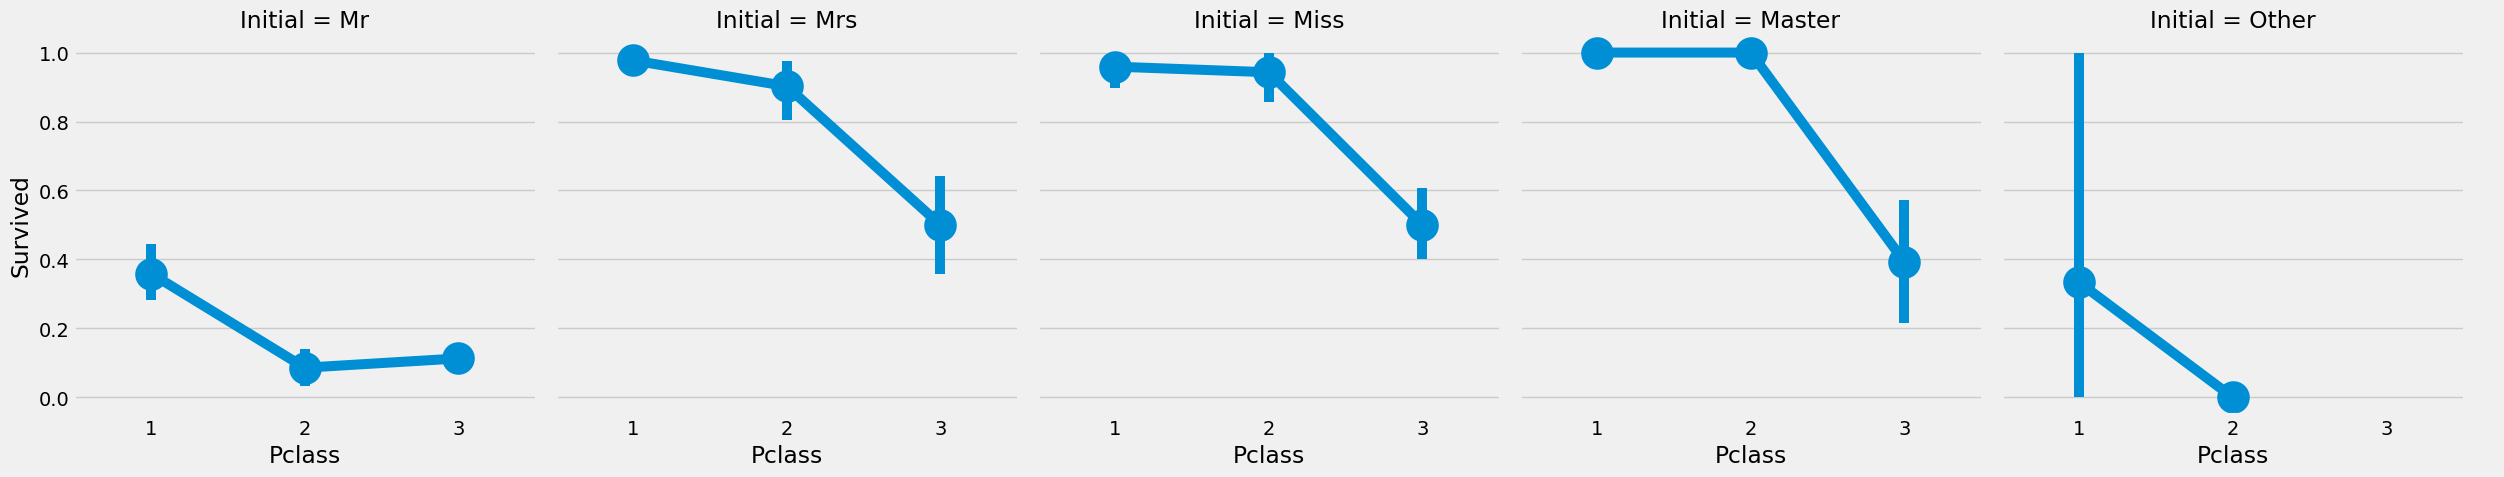

In [32]:
sns.catplot(x='Pclass',y='Survived',col='Initial', kind = 'point', data=training_data)
plt.show()

In [34]:
pd.crosstab([training_data.Embarked,training_data.Pclass],[training_data.Sex,training_data.Survived],margins=True).style.background_gradient(cmap='summer_r')

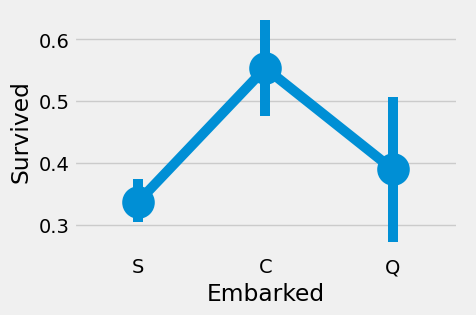

In [38]:
sns.catplot(x='Embarked',y='Survived',kind='point', data=training_data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

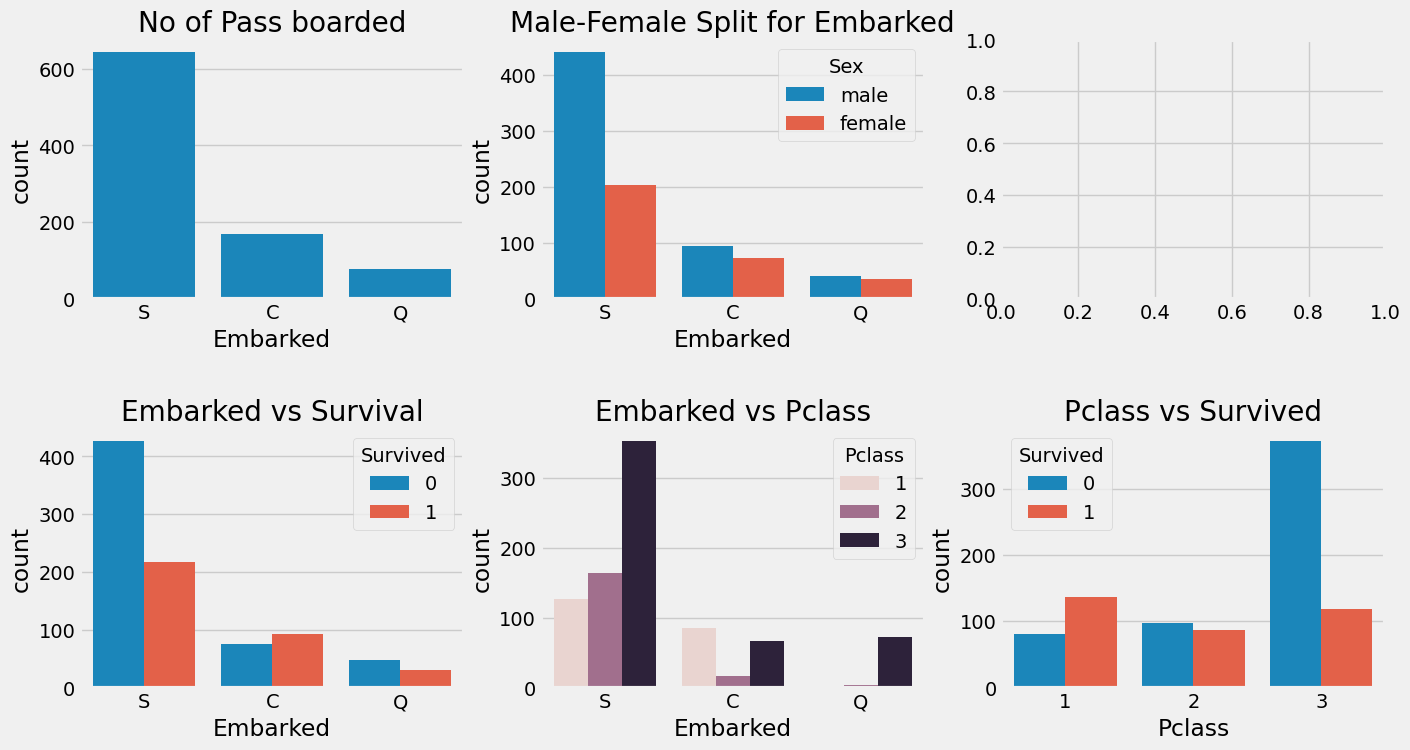

In [49]:
f,ax=plt.subplots(2,3,figsize=(15,8))
sns.countplot(x='Embarked',data=training_data,ax=ax[0,0])
ax[0,0].set_title('No of Pass boarded')
sns.countplot(x='Embarked',hue='Sex',data=training_data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=training_data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survival')
sns.countplot(x='Embarked',hue='Pclass',data=training_data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
sns.countplot(x='Pclass',hue='Survived',data=training_data,ax=ax[1,2])
ax[1,2].set_title('Pclass vs Survived')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

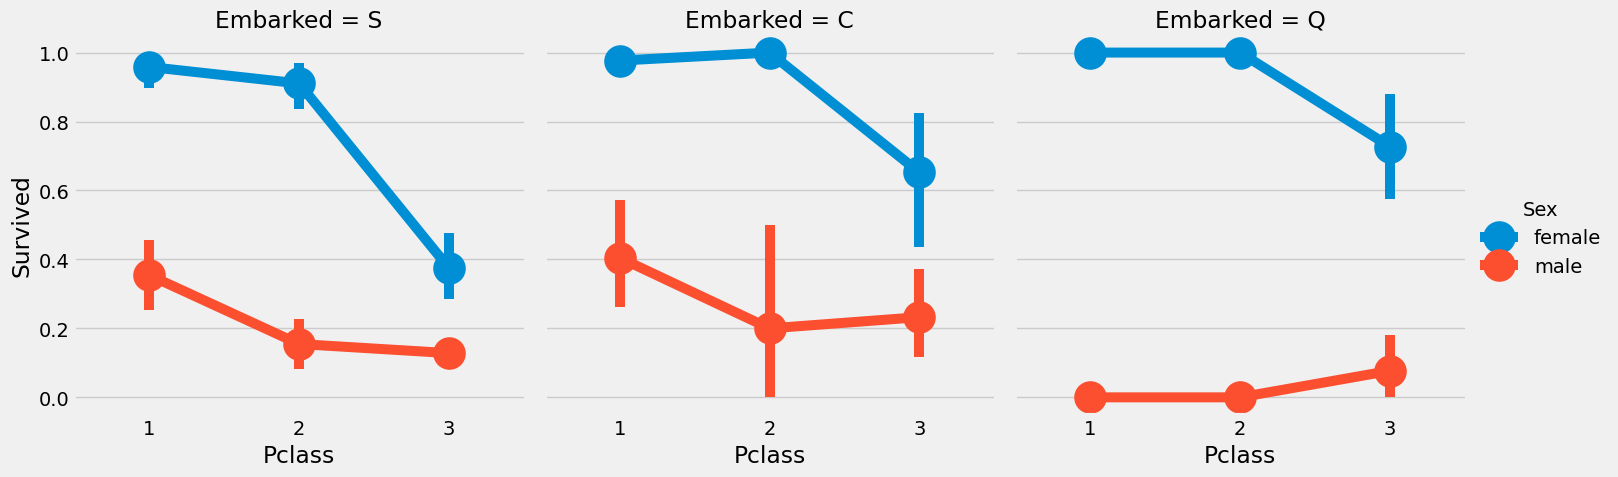

In [52]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked', kind='point',data=training_data)

In [53]:
training_data['Embarked'].fillna('S',inplace=True)

In [54]:
training_data.Embarked.isnull().any()

False

In [57]:
pd.crosstab([training_data.SibSp],training_data.Survived).T.style.background_gradient(cmap='summer_r')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


Text(0.5, 1.0, 'SibSp vs Susrvied')

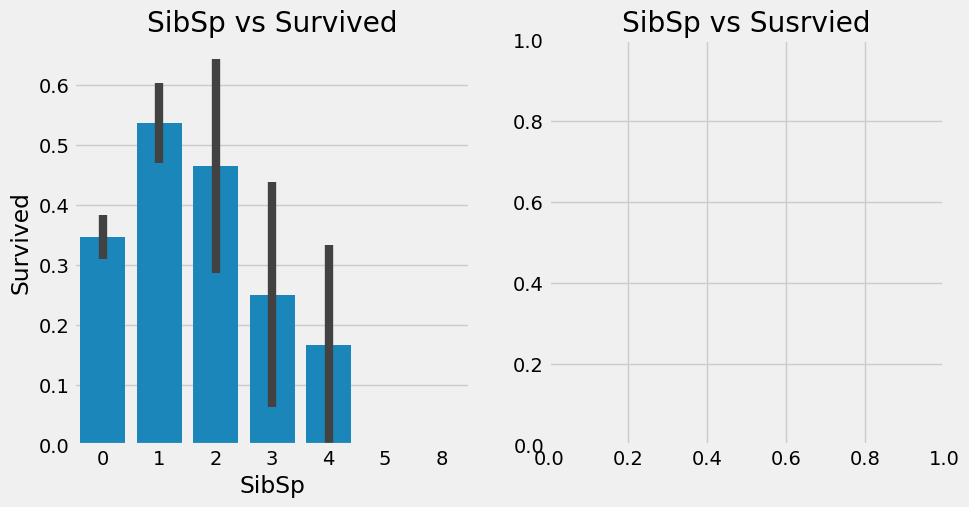

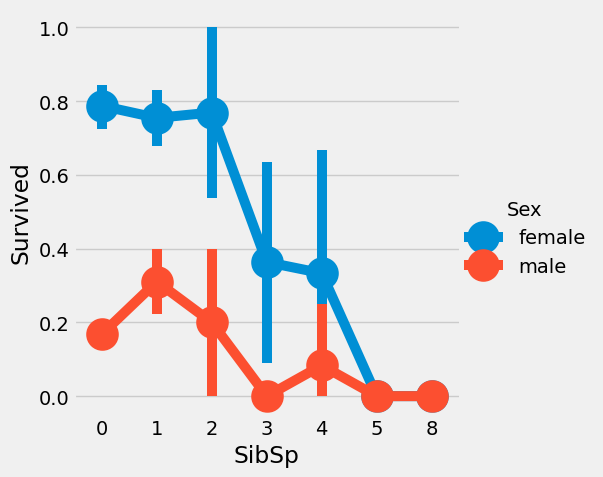

In [79]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='SibSp',y='Survived',data=training_data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.catplot(x='SibSp',y='Survived', hue='Sex', kind='point', data=training_data,ax=ax[1])
ax[1].set_title('SibSp vs Susrvied')